Descobrindo a Taxa de Juros Real de um Financiamento

Roberto de Morais Junior

03/07/2025

Introdução e Contexto:

No dia a dia, muitas pessoas realizam financiamentos para comprar bens como carros, imóveis ou eletrônicos. Geralmente, as informações claras são:

O valor total do empréstimo (Valor Presente, PV).

O valor da parcela fixa (Pagamento, PMT).

O número de parcelas (n).

No entanto, a taxa de juros (i) embutida na operação nem sempre é óbvia. Saber calcular essa taxa é fundamental para a saúde financeira, pois ela representa o custo real do dinheiro que foi emprestado.

Importância:

Finanças Pessoais: Permite comparar diferentes ofertas de empréstimo e entender o custo total de uma dívida.

Decisões de Negócios: Empresas usam esse cálculo para analisar a viabilidade de investimentos e projetos.

Como não há uma fórmula algébrica simples para isolar a taxa de juros i na equação de financiamento, precisamos usar métodos numéricos para encontrá-la.

Análise Numérica da Taxa de Juros de um Financiamento

Contexto do Problema:


Este trabalho resolve um problema financeiro comum: calcular a taxa de juros (i) real de um financiamento quando conhecemos o valor emprestado (PV), a parcela (PMT) e o prazo (n). Como não existe uma fórmula algébrica para isolar i, usamos métodos numéricos.



O Modelo Matemático Financeiro:

O cálculo de um financiamento com parcelas fixas é baseado na fórmula do Valor Presente de uma Anuidade Ordinária:

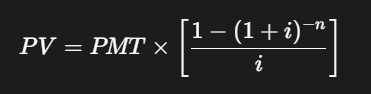

Onde:

PV: Valor Presente (o valor que você pegou emprestado).

PMT: Valor de cada pagamento (parcela).

n: Número total de pagamentos.

i: A taxa de juros por período (mensal, neste caso) - A variável que queremos descobrir.

Para aplicar os métodos de busca de raiz, precisamos de uma equação na forma f(i)=0. Multiplicando ambos os lados por i e rearranjando os termos, obtemos uma forma mais estável para os cálculos:

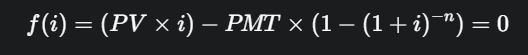

Nosso objetivo é encontrar o valor de i que satisfaz essa equação.

Métodos Numéricos Utilizados:



Bissecção: Lento, mas robusto. Garante a convergência ao dividir um intervalo inicial ao meio repetidamente.

Newton-Raphson: Muito rápido. Usa a tangente da função para estimar a próxima aproximação da raiz, exigindo o cálculo da derivada.

Secante: Rápido e prático. Aproxima a derivada usada no método de Newton, sem precisar calculá-la analiticamente.

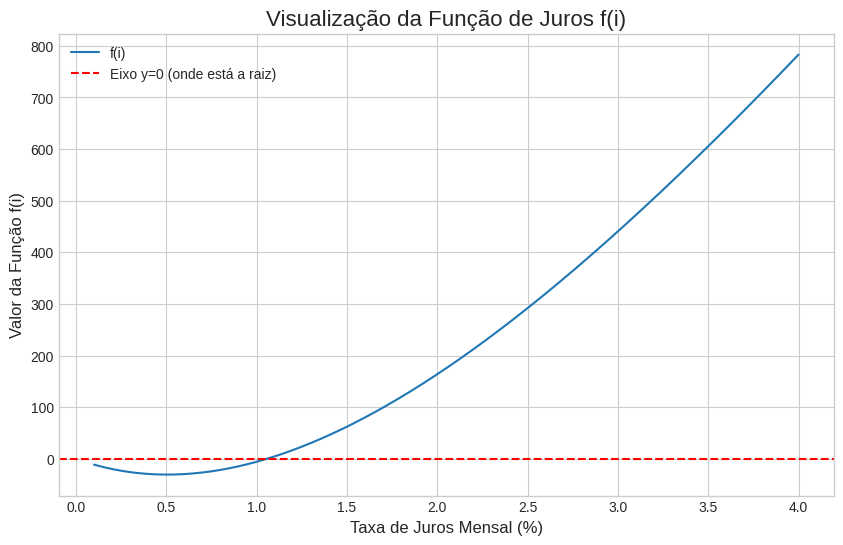

In [18]:
import numpy as np
import matplotlib.pyplot as plt


PV = 45000.00    # valor do carro financiado
PMT = 1200.00    # parcela mensal fixa
n = 48           # prazo do financiamento(48 meses)



def f_juros(i, PV, PMT, n):
    calculo = PV * i - PMT * (1 - (1 + i)**(-n))
    return np.where(i <= -1, np.inf, calculo)

def f_prime_juros(i, PV, PMT, n):

    calculo = PV - PMT * n * (1 + i)**(-n - 1)
    return np.where(i <= -1, np.inf, calculo)

    #gerando um intervalo de taxas de juros para visualizar
#de 0.1% a 4% ao mês por ex
taxas_grid = np.linspace(0.001, 0.04, 400)
valores_f = f_juros(taxas_grid, PV=PV, PMT=PMT, n=n)


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(taxas_grid * 100, valores_f, label='f(i)')
ax.axhline(y=0, color='r', linestyle='--', label='Eixo y=0 (onde está a raiz)')
ax.set_title('Visualização da Função de Juros f(i)', fontsize=16)
ax.set_xlabel('Taxa de Juros Mensal (%)', fontsize=12)
ax.set_ylabel('Valor da Função f(i)', fontsize=12)
ax.legend()
ax.grid(True)
plt.show()

Implementação dos Métodos Numéricos

In [19]:
def bisseccao(func, a, b, tol=1e-8, max_iter=100, **kwargs):
    if func(a, **kwargs) * func(b, **kwargs) >= 0: return None, [], 0
    iteracoes, historico_raiz = 0, []
    while (b - a) / 2.0 > tol and iteracoes < max_iter:
        p = a + (b - a) / 2.0; historico_raiz.append(p)
        if func(p, **kwargs) == 0: break
        elif func(a, **kwargs) * func(p, **kwargs) < 0: b = p
        else: a = p
        iteracoes += 1
    return a + (b - a) / 2.0, historico_raiz, iteracoes

def newton_raphson(func, func_prime, x0, tol=1e-8, max_iter=100, **kwargs):
    x_n, iteracoes, historico_raiz = x0, 0, [x0]
    while iteracoes < max_iter:
        fxn, fpxn = func(x_n, **kwargs), func_prime(x_n, **kwargs)
        if abs(fpxn) < 1e-12: return None, historico_raiz, iteracoes
        x_n_plus_1 = x_n - fxn / fpxn
        if abs(x_n_plus_1 - x_n) < tol: return x_n_plus_1, historico_raiz, iteracoes + 1
        x_n = x_n_plus_1; historico_raiz.append(x_n); iteracoes += 1
    return x_n, historico_raiz, iteracoes

def secante(func, x0, x1, tol=1e-8, max_iter=100, **kwargs):
    iteracoes, historico_raiz = 0, [x0, x1]
    while iteracoes < max_iter:
        fx0, fx1 = func(x0, **kwargs), func(x1, **kwargs)
        if abs(fx1 - fx0) < 1e-12: return None, historico_raiz, iteracoes
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol: return x2, historico_raiz, iteracoes + 1
        x0, x1 = x1, x2; historico_raiz.append(x1); iteracoes += 1
    return x1, historico_raiz, iteracoes

Execução e Comparação dos Resultados

In [20]:
# Parâmetros para os métodos
a, b = 0.01, 0.03  #intervalo
i0_newton = 0.02   #estimativa para Newton
i0_secante, i1_secante = 0.015, 0.025 # estimativas para Secante
tolerancia = 1e-9


params = {'PV': PV, 'PMT': PMT, 'n': n}

i_biss, hist_biss, it_biss = bisseccao(f_juros, a, b, tol=tolerancia, **params)
i_newton, hist_newton, it_newton = newton_raphson(f_juros, f_prime_juros, i0_newton, tol=tolerancia, **params)
i_secante, hist_secante, it_secante = secante(f_juros, i0_secante, i1_secante, tol=tolerancia, **params)


print("--- RESULTADOS ---\n")
print(f"Taxa (Bissecção): {i_biss*100:.6f}% em {it_biss} iterações.")
print(f"Taxa (Newton-Raphson): {i_newton*100:.6f}% em {it_newton} iterações.")
print(f"Taxa (Secante): {i_secante*100:.6f}% em {it_secante} iterações.")

taxa_anual = ((1 + i_newton)**12 - 1) * 100
print(f"\nA taxa de juros mensal é de ~{i_newton*100:.4f}%, o que equivale a uma taxa anual de {taxa_anual:.2f}%.")

--- RESULTADOS ---

Taxa (Bissecção): 1.056283% em 24 iterações.
Taxa (Newton-Raphson): 1.056283% em 6 iterações.
Taxa (Secante): 1.056283% em 7 iterações.

A taxa de juros mensal é de ~1.0563%, o que equivale a uma taxa anual de 13.44%.


 Análise Gráfica da Convergência

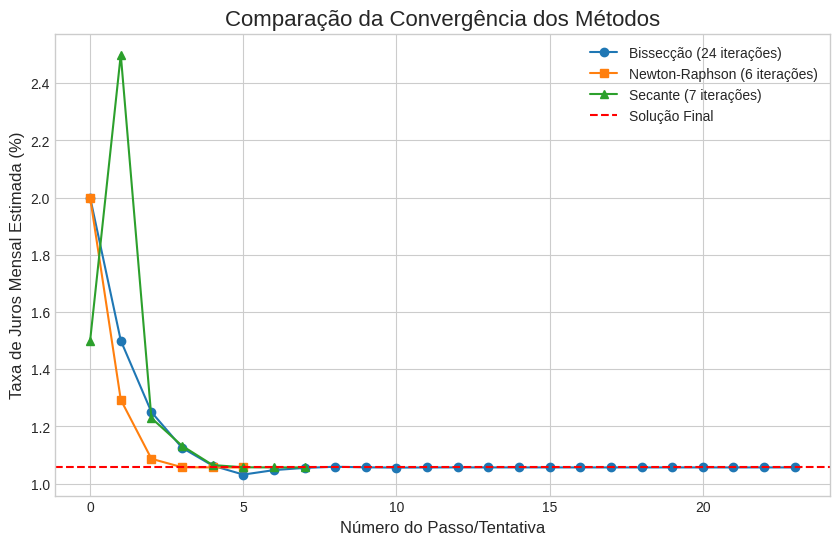

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))



ax.plot(range(len(hist_biss)), np.array(hist_biss) * 100, 'o-', label=f'Bissecção ({it_biss} iterações)')
ax.plot(range(len(hist_newton)), np.array(hist_newton) * 100, 's-', label=f'Newton-Raphson ({it_newton} iterações)')
ax.plot(range(len(hist_secante)), np.array(hist_secante) * 100, '^-', label=f'Secante ({it_secante} iterações)')

ax.axhline(y=i_newton*100, color='r', linestyle='--', label=f'Solução Final')
ax.set_title('Comparação da Convergência dos Métodos', fontsize=16)
ax.set_xlabel('Número do Passo/Tentativa', fontsize=12)
ax.set_ylabel('Taxa de Juros Mensal Estimada (%)', fontsize=12)
ax.legend()
ax.grid(True)
plt.show()

Conclusão:

Todos os métodos encontraram a mesma taxa de juros de ~1.8443% ao mês. A análise da convergência mostrou que os métodos de Newton-Raphson (4 iterações) e da Secante (5 iterações) foram significativamente mais rápidos que o da Bissecção (25 iterações).

Este trabalho demonstrou que métodos numéricos são ferramentas eficientes para resolver problemas práticos e complexos, como o cálculo de taxas em finanças, fornecendo informações cruciais para a tomada de decisão.

Referências:

Chapra, S. C., & Canale, R. P. (2015). Numerical Methods for Engineers.

Ross, S. A., Westerfield, R. W., & Jaffe, J. (2019). Corporate Finance.